In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.segmentation import slic
from skimage import segmentation
from skimage.segmentation import flood

# Segmentación por crecimiento de regiones

## Cargue la imagen de trabajo y visualícela.

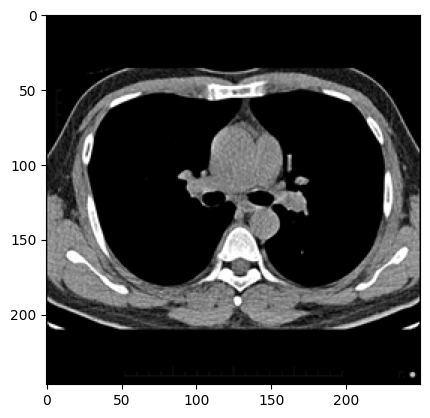

In [38]:
chest = cv2.imread("images/Chest.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(chest, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

## Manualmente, usando paint, cree una máscara asociada al área oscura que corresponde a los pulmones, tratando de respetar la región de la manera más precisa posible.

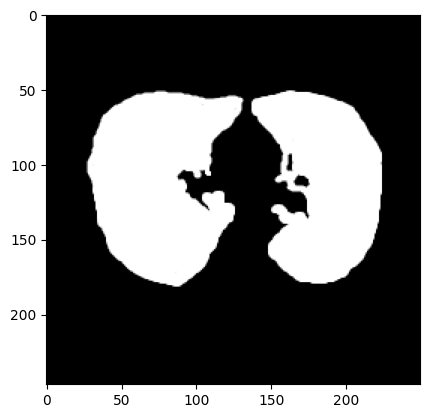

In [39]:
chest_mask= cv2.imread("images/Chest Mask.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(chest_mask, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

## Usando ahora dos semillas, utilice el algoritmo de crecimiento de regiones para segmentar de forma automática el área de los pulmones. Pruebe con varios valores de tolerancia.

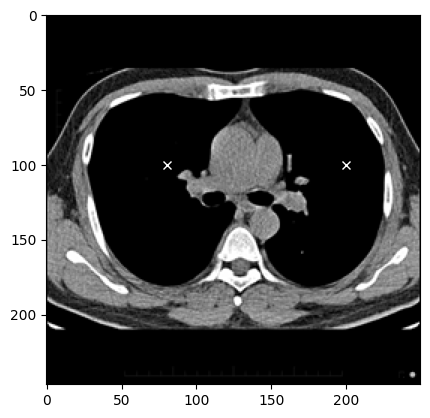

In [40]:
p1 = (80,100)
p2 = (200,100)

plt.imshow(chest, cmap= 'gray', vmin = 0, vmax= 255)
plt.plot([p1[0]], [p1[1]], marker='x', color='white')
plt.plot([p2[0]], [p2[1]], marker='x', color='white')
plt.show()

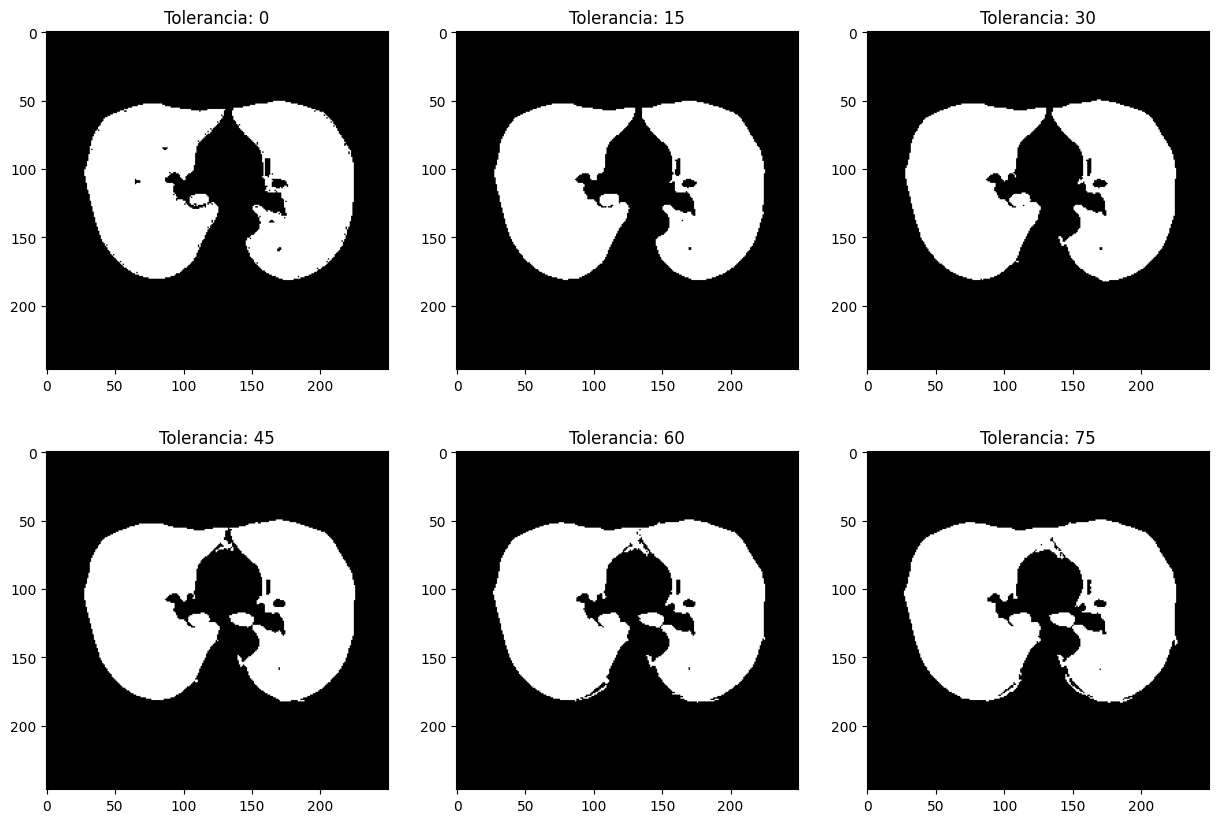

In [41]:
tol = [[0, 15,30],
       [45, 60,75]] 
fig, axes = plt.subplots(len(tol),len(tol[0]), figsize = (15,10))
for i in range(len(tol)):
    for j in range(len(tol[i])):
        A = tol[i][j]
        mascara1 = flood(chest, (p1[1], p1[0]), tolerance=A)
        mascara2 = flood(chest,  (p2[1], p2[0]), tolerance=A)

        mascara_final = np.logical_or(mascara1, mascara2)

        axes[i][j].imshow(mascara_final, cmap= 'gray')
        axes[i][j].set_title(f'Tolerancia: {A}')

        if A == 30:
            mascara_ = mascara_final

plt.show()


Como se puede apreciar, con una tolerancia entre 0 y 30 se obtienen muy buenos resultados para obtener la forma de los pulmones.

## Compare ambos resultados. ¿Cómo se puede determinar cualitativamente dos regiones? ¿Cuál segmentación tiene mejor calidad?

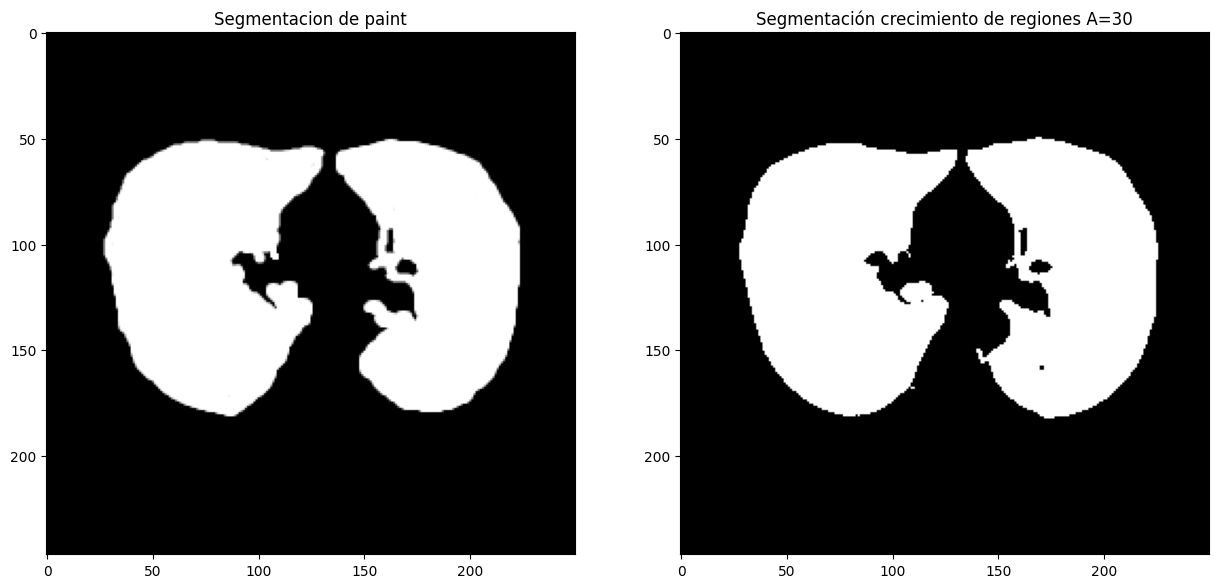

In [42]:
fig, axes = plt.subplots(1,2,  figsize = (15,10))

axes[0].imshow(chest_mask, cmap= 'gray')
axes[0].set_title(f'Segmentacion de paint')

axes[1].imshow(mascara_, cmap= 'gray')
axes[1].set_title(f'Segmentación crecimiento de regiones A=30')

plt.show()


Como se puede observar, la segmentación en paint cubre de peor forma los bordes de los pulmones, y esto se instensifica en las zonas cerradas o rodeadas. Al punto que no tiene la resolución para distinguir el punto negro en el pulmon derecho. En terminos de covertura esa es similar y se puede decir que las mismas zonas son segmentadas por los mismos métodos. Sin embargo la forma en paint es inconsistente y cada vez se obtendrá un resultado distinto. Mientras que si se utiliza la misma tolerancia y puntos de inicio el método por crecimiento de regiones siempre será igual.